In [1]:
import pandas as pd
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
from PIL import Image
import json
from keras.models import model_from_json
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
face_cascade = cv2.CascadeClassifier('../../data/haarcascade_frontalface_default.xml')

In [3]:
def getFace(img):
    img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(img_bw, 1.1, 4)

    # Ensure there is at least 1 face
    if len(faces) > 0:
        print("Face detected!")
        x,y,w,h = faces[0]
        return new_size(img_bw[y:y+h,x:x+w])
    else:
        raise ValueError("No face found")
        
        
def openImageAndDetectFaces(path):
    img = cv2.imread(path)
    plt.imshow(img)
    try:
        print(f"Detecting faces in {path}")
        face_patch = getFace(img)
        return face_patch
    except ValueError as e:
        print(f"Not found image in {path}")
        return None

def new_size(img):
    size=(48,48)
    convert_to = Image.fromarray(img)
    convert_from = convert_to.resize(size)
    face=asarray(convert_from)/255
    return face

In [4]:
with open('fer.json','r') as f:
    model_json = json.load(f)
model = model_from_json(model_json)
model.load_weights('fer_model.h5')

Detecting faces in ../../data/antonio.jpg
Face detected!
Probs -> angry:0.00000 disgust:0.00000 fear:0.00002 happy:0.99964 sadness:0.00000 surprise:0.00000 neutral:0.00034


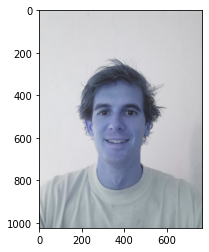

In [5]:
PIC = openImageAndDetectFaces("../../data/antonio.jpg")
['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 48, 48, 1)
pred2 = model.predict(PIC)[0]
print("Probs -> angry:{0:.5f} disgust:{1:.5f} fear:{2:.5f} happy:{3:.5f} sadness:{4:.5f} surprise:{5:.5f} neutral:{6:.5f}".format(pred2[0],pred2[1],pred2[2],pred2[3],pred2[4],pred2[5], pred2[6]))

In [6]:
df=pd.read_csv('../../data/songs_clean.csv')

In [7]:
df.head()

,Unnamed: 0,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,danceability,energy,acousticness,instrumentalness,liveness,neg,pos,neu,senti
0,1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,2017-11-21,Hard Rock Workout,rock,0.303,0.880,0.01170,0.00994,0.3470,0.036,0.294,0.670,angry
1,2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,0.845,0.652,0.00432,0.00723,0.4890,0.075,0.159,0.766,fear
2,3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,2012-10-29,Christmas Soul,r&b,0.425,0.378,0.68900,0.00000,0.0664,0.093,0.155,0.752,nothing
3,4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,pop,0.760,0.887,0.03700,0.00000,0.1380,0.363,0.051,0.586,happy
4,5,Soldier,James TW,"Hold your breath, don't look down, keep trying...",70,Chapters,2019-04-26,urban contemporary,r&b,0.496,0.639,0.28000,0.00000,0.0975,0.138,0.175,0.687,disgust


In [8]:
df[df["senti"]=="happy"].sample(n=1)

,Unnamed: 0,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,danceability,energy,acousticness,instrumentalness,liveness,neg,pos,neu,senti
1596,1919,SICKO MODE - Skrillex Remix,Travis Scott,"NA Astro, yeah Sun is down, freezin' cold That...",66,SICKO MODE (Skrillex Remix),2018-11-28,RAP Gangsta,rap,0.651,0.833,0.0214,0.0,0.14,0.087,0.163,0.75,happy


In [9]:
df[df["senti"]=="happy"].sample(n=1).iloc[0]["track_name"]

'AGEN WIDA'

Detecting faces in ../../data/nicola.jpeg
Face detected!
Today you are neutral. I recommend the song Inbetween Days by The Cure from the album  The Head On The Door. You can find in the Spotify playlist call permanent wave


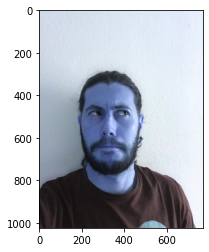

In [10]:
PIC = openImageAndDetectFaces("../../data/nicola.jpeg")
senti= ['anger', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 48, 48, 1)
pred2 = model.predict(PIC)[0]
feeling=senti[max(range(len(pred2)), key = lambda x: pred2[x])]
feeling_song= df[df["senti"]==feeling].sample(n=1)
song= feeling_song.iloc[0]["track_name"]
artist= feeling_song.iloc[0]["track_artist"]
album= feeling_song.iloc[0]["track_album_name"]
playlist= feeling_song.sample(n=1).iloc[0]["playlist_name"]

print(f'Today you are {senti[max(range(len(pred2)), key = lambda x: pred2[x])]}. I recommend the song {song} by {artist} from the album  {album}. You can find in the Spotify playlist call {playlist}')

In [14]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

options = webdriver.ChromeOptions()
options.add_argument("start-maximized")
options.add_argument("disable-infobars")
options.add_argument("--disable-extensions")
driver=webdriver.Chrome(chrome_options=options, executable_path=r'../../data/chromedriver')
driver.get("https://www.youtube.com/")
WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input#search"))).send_keys("Python")
driver.find_element_by_css_selector("button.style-scope.ytd-searchbox#search-icon-legacy").click()
a=[my_href.get_attribute("href") for my_href in WebDriverWait(driver, 5).until(EC.visibility_of_all_elements_located((By.CSS_SELECTOR, "a.yt-simple-endpoint.style-scope.ytd-video-renderer#video-title")))][0]

/home/jorge/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


In [31]:
a

'https://www.youtube.com/watch?v=chPhlsHoEPo'

In [43]:
import urllib.request
from bs4 import BeautifulSoup

textToSearch = 'Python'
query = urllib.parse.quote(textToSearch)
url = "https://www.youtube.com/results?search_query=python" 
response = urllib.request.urlopen(url)
html = response.read()
soup = BeautifulSoup(html, 'html.parser')
for vid in soup.findAll(attrs={'class':'yt-uix-tile-link'}):
    print('https://www.youtube.com' + vid['href'])

In [68]:
a=soup.find("body")
a=str(a)

TypeError: 'NoneType' object is not callable

In [72]:
a

'<body dir="ltr">\n<script>\n    if (window.ytcsi) {window.ytcsi.tick("bs", null, \'\');}    ytcfg.set(\'initialBodyClientWidth\', document.body.clientWidth);\n\n    window.ytcfg.set(\'SERVICE_WORKER_KILLSWITCH\', false);\n  </script>\n<script>\n    window["ytInitialData"] = {"responseContext":{"serviceTrackingParams":[{"service":"GUIDED_HELP","params":[{"key":"context","value":"yt_web_search"},{"key":"logged_in","value":"0"}]},{"service":"GFEEDBACK","params":[{"key":"has_unlimited_entitlement","value":"False"},{"key":"logged_in","value":"0"},{"key":"e","value":"23923955,23927284,23858564,23929220,23836115,23890076,23842638,23919025,23919576,23923862,23735347,23839597,23703445,23832002,23874051,23811985,23816681,23897872,23919047,23876021,23885661,23919856,23928831,23929658,23918657,23882139,23797973,23834232,23882125,23927501,23917629,24304055,24612067,23895498,23919462,23904385,23910755,23928184,23864523,23862065,23895174,23895138,23928328,23865206,23870434,23895275,23911301,23923201

In [ ]:
r'(\w+)@([\.\w]+)', email_address)

In [124]:
re.search(r'videoId\":"\w*\"', a).group()

'videoId":"9ojhJsXNWCI"'

In [ ]:
r"(?:'.*?')|(?:\".*?\")", frase

In [36]:
import requests
from bs4 import BeautifulSoup

base="https://www.youtube.com/results?search_query=python"
query="python"
res = requests.get(base)
soup = BeautifulSoup(res.text, 'html.parser')

In [158]:
from bs4 import BeautifulSoup
import json
import requests
target_url = "https://www.youtube.com/watch?v=dWuTh_BSmY4"
dict_str = ""
session = requests.Session()
headers = {'user-agent':'Mozilla/5.0 (Windows NT 6.1;Win64;x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36'}
html = requests.get(target_url)
soup = BeautifulSoup(html.text, "html.parser")
next_url = "https://www.youtube.com/live_chat_replay?continuation=op2w0wRaGlBDamdhRFFvTGJUaEhUbWRNV2toelREZ3FKd29ZVlVNeFJFTmxaRkpuUjBoQ1pHMDRNVVV4Ykd4TWFFOVJFZ3R0T0VkT1oweGFTSE5NT0NBQkABcgIIBHgB"
html = session.get(next_url, headers=headers)
soup = BeautifulSoup(html.text.replace("script","scriptxx"),"lxml")
for scrp in soup.find_all("scriptxx"):
    if "window[\"ytInitialData\"]" in scrp.text:
        print("existed:window[\"ytInitialData\"]")

existed:window["ytInitialData"]


In [118]:
from bs4 import BeautifulSoup as bs
import requests
import re
import json


url='https://www.youtube.com/results?search_query=python'
searched=requests.get(url,headers=headers)
soup=bs(searched.text,'html.parser')
aid=soup.find('script',string=re.compile('ytInitialData'))
extracted_josn_text=aid.text.split(';')[0].replace('window["ytInitialData"] =','').strip()
video_results=json.loads(extracted_josn_text)
#print(item_section=video_results["contents"]["twoColumnSearchResultsRenderer"]["primaryContents"]["sectionListRenderer"]["contents"][1])
item_section=video_results["contents"]["twoColumnSearchResultsRenderer"]["primaryContents"]["sectionListRenderer"]["contents"][0]["itemSectionRenderer"]["contents"]

for item in item_section:
    try:
        video_info=item["videoRenderer"]
        title=video_info["title"]["simpleText"]
        url=video_info["navigationEndpoint"]["commandMetadata"]["webCommandMetadata"]["url"]
        print('Title:',title)
        print('Url:',url, end="\n----------\n")
    except KeyError:
            pass

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [126]:
import googleapiclient.discovery
from urllib.parse import parse_qs, urlparse

#extract playlist id from url
url = 'https://www.youtube.com/playlist?list=PL3D7BFF1DDBDAAFE5'
query = parse_qs(urlparse(url).query, keep_blank_values=True)
playlist_id = query["list"][0]

print(f'get all playlist items links from {playlist_id}')
youtube = googleapiclient.discovery.build("youtube", "v3", developerKey = "YOUR_API_KEY")

request = youtube.playlistItems().list(
    part = "snippet",
    playlistId = playlist_id,
    maxResults = 50
)
response = request.execute()

playlist_items = []
while request is not None:
    response = request.execute()
    playlist_items += response["items"]
    request = youtube.playlistItems().list_next(request, response)

print(f"total: {len(playlist_items)}")
print([ 
    f'https://www.youtube.com/watch?v={t["snippet"]["resourceId"]["videoId"]}&list={playlist_id}&t=0s'
    for t in playlist_items
])

get all playlist items links from PL3D7BFF1DDBDAAFE5


HttpError: <HttpError 400 when requesting https://www.googleapis.com/discovery/v1/apis/youtube/v3/rest?key=YOUR_API_KEY returned "API key not valid. Please pass a valid API key.". Details: "[{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Google developers console', 'url': 'https://console.developers.google.com'}]}]">

In [146]:
def generate_search_url(self, query):
        """
        Generates a search URL for YouTube for a given search query.

        Parameters
        ----------
        query: `str`
            The search query.

        Returns
        -------
        search_url: `str`
            A URL which corresponds to YouTube search results.
        """

        quoted_query = urllib.request.quote(query)
        search_url = self.base_search_url.format(quoted_query)
        return search_url 

In [155]:
def search_all_files(search_url, youtube_object=YouTube()):
    search_url = search_url 
    urls = get_urls(search_url)
    yt = youtube_object
    for url in urls:
        try:
            print("downloading " + url)
            yt.url = url
            video = yt.get('mp4', '720p')
            filename = yt.filename
            video.download()
            time.sleep(.1)
            cc = getyoutubecc.getyoutubecc(yt.video_id,'en')
            cc.writeSrtFile(filename + '.srt')
            time.sleep(.1)
        except:
            print("couldn't download" + url )

NameError: name 'YouTube' is not defined

In [156]:
#https://www.programcreek.com/python/example/92182/pytube.YouTube